# Climate applications for ...

This document has been published for reproducing the application presented in a software paper dedicated to AeroMAPS, submitted to [Journal of Open Aviation Science](https://journals.open.tudelft.nl/joas/index). The different assumptions of this prospective scenario are given in the following. 

An illustrative 2% annual air traffic growth is assumed for the different aviation markets, i.e. lower than trend estimates of around 3%. The impact of COVID-19 is modelled assuming that air traffic returns to 2019 levels in 2024. Concerning the aircraft fleet, an accelerated fleet renewal is assumed with the introduction of 20% more efficient aircraft architectures in 2035. A hydrogen-powered aircraft is more specifically considered for short-range. Operational improvements are also included for reducing fuel consumption, but operational strategies for contrail avoidance are not considered here, even though it is a promising approach. Regarding the replacement of kerosene by drop-in fuels (biofuel and electrofuel here), ReFuelEU targets are considered as blending mandates. Different pathways are considered for the production of biofuel and hydrogen. Electricity production is expected to decarbonise rapidly and strongly, so that CO<sub>2</sub> emissions from electricity-based fuels will be lower than those from kerosene by 2035. On the economic side, several assumptions are made such as median fuel costs or a constant electricity price of 80 €/MWh. Moreover, a carbon price trajectory, based on *Alain Quinet, What Value Do We Attach to Climate Action?, 2019*, is implemented in the form of a tax on the emissions of fossil and alternative fuels.

Moreover, in order to carry out a sustainability assessment, some assumptions are required for setting targets for aviation. A climate target of +1.8°C with a 67% chance of success is chosen as well as a moderate use of Carbon Dioxide Removal (CDR) worldwide. Median estimations are considered for biomass and electricity availability. Finally, concerning allocation rules, a grandfathering approach is assumed for climate issues, which means that 2.6% (i.e. aviation's current share of CO<sub>2</sub> emissions) of the world carbon budget is allocated for aviation. For energy resources, an illustrative and arbitrary allocation of 5% is assumed.

## Load

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import (
    models_simple,
    models_complex,
    models_complex_improvedgwpstar,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

## Climate models

### Simple GWP*

In [2]:
# Create process
process1 = AeromapsProcess(
    models=models_complex,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [3]:
# Change end year
process1.parameters.end_year = 2100
process1.setup()

In [4]:
# Air traffic evolution

## Growth rate by category [%]
process1.parameters.cagr_passenger_short_range_reference_periods = []
process1.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process1.parameters.cagr_passenger_medium_range_reference_periods = []
process1.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process1.parameters.cagr_passenger_long_range_reference_periods = []
process1.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process1.parameters.cagr_freight_reference_periods = []
process1.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet1 = process1.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet1.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet1.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet1.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet1.categories["Short Range"].parameters.life = 20
fleet1.categories["Medium Range"].parameters.life = 20
fleet1.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process1.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process1.parameters.operations_final_gain = 8.0  # [%]
process1.parameters.operations_start_year = 2025
process1.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process1.parameters.operations_contrails_final_gain = 100  # [%]
process1.parameters.operations_contrails_start_year = 2050
process1.parameters.operations_contrails_duration = 5.0
process1.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process1.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process1.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process1.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process1.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process1.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process1.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process1.parameters.hydrogen_electrolysis_share_reference_years = []
process1.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process1.parameters.hydrogen_gas_share_reference_years = []
process1.parameters.hydrogen_gas_share_reference_years_values = [0]

### Improved GWP* with median TCRE

In [5]:
# Create process
process2 = AeromapsProcess(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [6]:
# Change end year
process2.parameters.end_year = 2100
process2.setup()

In [7]:
# Air traffic evolution

## Growth rate by category [%]
process2.parameters.cagr_passenger_short_range_reference_periods = []
process2.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process2.parameters.cagr_passenger_medium_range_reference_periods = []
process2.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process2.parameters.cagr_passenger_long_range_reference_periods = []
process2.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process2.parameters.cagr_freight_reference_periods = []
process2.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet2 = process2.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet2.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet2.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet2.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet2.categories["Short Range"].parameters.life = 20
fleet2.categories["Medium Range"].parameters.life = 20
fleet2.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process2.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process2.parameters.operations_final_gain = 8.0  # [%]
process2.parameters.operations_start_year = 2025
process2.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process2.parameters.operations_contrails_final_gain = 100  # [%]
process2.parameters.operations_contrails_start_year = 2050
process2.parameters.operations_contrails_duration = 5.0
process2.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process2.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process2.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process2.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process2.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process2.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process2.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process2.parameters.hydrogen_electrolysis_share_reference_years = []
process2.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process2.parameters.hydrogen_gas_share_reference_years = []
process2.parameters.hydrogen_gas_share_reference_years_values = [0]

process2.parameters.tcre_coefficient = 0.00045

### Improved GWP* with FaIR TCRE

In [8]:
# Create process
process3 = AeromapsProcess(
    models=models_complex_improvedgwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

In [9]:
# Change end year
process3.parameters.end_year = 2100
process3.setup()

In [10]:
# Air traffic evolution

## Growth rate by category [%]
process3.parameters.cagr_passenger_short_range_reference_periods = []
process3.parameters.cagr_passenger_short_range_reference_periods_values = [2.0]
process3.parameters.cagr_passenger_medium_range_reference_periods = []
process3.parameters.cagr_passenger_medium_range_reference_periods_values = [2.0]
process3.parameters.cagr_passenger_long_range_reference_periods = []
process3.parameters.cagr_passenger_long_range_reference_periods_values = [2.0]
process3.parameters.cagr_freight_reference_periods = []
process3.parameters.cagr_freight_reference_periods_values = [2.0]

# Aircraft fleet

## Initialization
fleet3 = process3.fleet

## Short Range
short_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=-75.0,
    soot_evolution=-100.0,
    doc_non_energy_evolution=10.0,
    cruise_altitude=12000.0,
)
short_range_aircraft = Aircraft(
    "New Short-range Aircraft", parameters=short_range_aircraft_params, energy_type="HYDROGEN"
)
fleet3.categories["Short Range"].subcategories[0].add_aircraft(aircraft=short_range_aircraft)

## Medium Range
medium_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
medium_range_aircraft = Aircraft(
    "New Medium-range Aircraft", parameters=medium_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet3.categories["Medium Range"].subcategories[0].add_aircraft(aircraft=medium_range_aircraft)

## Long Range
long_range_aircraft_params = AircraftParameters(
    entry_into_service_year=2035,
    consumption_evolution=-20.0,
    nox_evolution=0.0,
    soot_evolution=0.0,
    doc_non_energy_evolution=0.0,
    cruise_altitude=12000.0,
)
long_range_aircraft = Aircraft(
    "New Long-range Aircraft", parameters=long_range_aircraft_params, energy_type="DROP_IN_FUEL"
)
fleet3.categories["Long Range"].subcategories[0].add_aircraft(aircraft=long_range_aircraft)

## Fleet renewal
fleet3.categories["Short Range"].parameters.life = 20
fleet3.categories["Medium Range"].parameters.life = 20
fleet3.categories["Long Range"].parameters.life = 20

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor for the final year [%]
process3.parameters.load_factor_end_year = 89

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function for reducing energy consumption
process3.parameters.operations_final_gain = 8.0  # [%]
process3.parameters.operations_start_year = 2025
process3.parameters.operations_duration = 25.0

## Values for setting the logistic function for reducing energy consumption
process3.parameters.operations_contrails_final_gain = 100  # [%]
process3.parameters.operations_contrails_start_year = 2050
process3.parameters.operations_contrails_duration = 5.0
process3.parameters.operations_contrails_final_overconsumption = 0.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process3.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process3.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 0.0]
process3.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060]
process3.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 100.0]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process3.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050, 2070]
process3.parameters.electricity_emission_factor_reference_years_values = [
    429.0,
    180.0,
    75.0,
    30.0,
    0.0,
]

## Share of hydrogen production pathways [%]
process3.parameters.hydrogen_electrolysis_share_reference_years = []
process3.parameters.hydrogen_electrolysis_share_reference_years_values = [100]
process3.parameters.hydrogen_gas_share_reference_years = []
process3.parameters.hydrogen_gas_share_reference_years_values = [0]

process3.parameters.tcre_coefficient = 0.00045

### Climate parameters

In [11]:
# Climate sensitivity
contrails_choice = "Lee"
nox_choice = "Grewe"
# Contrails
## Lee et al.
if contrails_choice == "Lee":
    process3.parameters.erf_coefficient_contrails = 1.058e-09
## Digby et al.
elif contrails_choice == "Digby":
    process3.parameters.erf_coefficient_contrails = 1.058e-09 * 8 / 57.4
# NOx
## Lee et al.
if nox_choice == "Lee":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 34.4 * 1.35 * 0.88
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -9.3 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_ch4_decrease = -18.7 * 1.35 * 0.88 * 0.79
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = (
        -2.8 * 1.35 * 0.88 * 0.79
    )
## Grewe et al.
elif nox_choice == "Grewe":
    process3.parameters.erf_coefficient_nox_short_term_o3_increase = 59.0
    process3.parameters.erf_coefficient_nox_long_term_o3_decrease = -4.1
    process3.parameters.erf_coefficient_nox_ch4_decrease = -12.3
    process3.parameters.erf_coefficient_nox_stratospheric_water_vapor_decrease = -1.5

## Compute

In [12]:
t1 = time.time()
process1.compute()
process2.compute()

t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: electricity_emission_factor - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

Computation time: 12.9 s


## Results

## Plots

In [13]:
# process.plot("air_transport_co2_emissions")

In [14]:
# process.plot("air_transport_climate_impacts")

In [15]:
# process.plot("temperature_increase_from_air_transport")

In [16]:
data_temperature_aeromaps_simple_gwpstar = (
    process1.models["temperature_simple_gwpstar"]
    .df_climate["temperature_increase_from_aviation"]
    .values
)
data_temperature_aeromaps_simple_gwpstar_co2 = (
    process1.models["temperature_simple_gwpstar"]
    .df_climate["temperature_increase_from_co2_from_aviation"]
    .values
)
data_temperature_aeromaps_simple_gwpstar_non_co2 = (
    process1.models["temperature_simple_gwpstar"]
    .df_climate["temperature_increase_from_non_co2_from_aviation"]
    .values
)

data_temperature_aeromaps_gwpstar = (
    process2.models["temperature_gwpstar"].df_climate["temperature_increase_from_aviation"].values
)
data_temperature_aeromaps_gwpstar_co2 = (
    process2.models["temperature_gwpstar"]
    .df_climate["temperature_increase_from_co2_from_aviation"]
    .values
)
data_temperature_aeromaps_gwpstar_non_co2 = (
    process2.models["temperature_gwpstar"]
    .df_climate["temperature_increase_from_non_co2_from_aviation"]
    .values
)

# Bug si lancé successivement
process3.compute()

data_temperature_aeromaps_gwpstar_fair = (
    process3.models["temperature_gwpstar"].df_climate["temperature_increase_from_aviation"].values
)
data_temperature_aeromaps_gwpstar_co2_fair = (
    process3.models["temperature_gwpstar"]
    .df_climate["temperature_increase_from_co2_from_aviation"]
    .values
)
data_temperature_aeromaps_gwpstar_non_co2_fair = (
    process3.models["temperature_gwpstar"]
    .df_climate["temperature_increase_from_non_co2_from_aviation"]
    .values
)

C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: electricity_emission_factor - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

In [17]:
reference_temperature_data_df = read_csv("data/reference_temperature_change.csv", delimiter=";")
reference_temperature_data = reference_temperature_data_df.values
data_years = reference_temperature_data[:, 0]
data_temperature_grewe_curtech = reference_temperature_data[:, 1]
data_temperature_grewe_ecats = reference_temperature_data[:, 2]
data_temperature_klower = reference_temperature_data[:, 3]
data_temperature_klower_co2 = reference_temperature_data[:, 4]

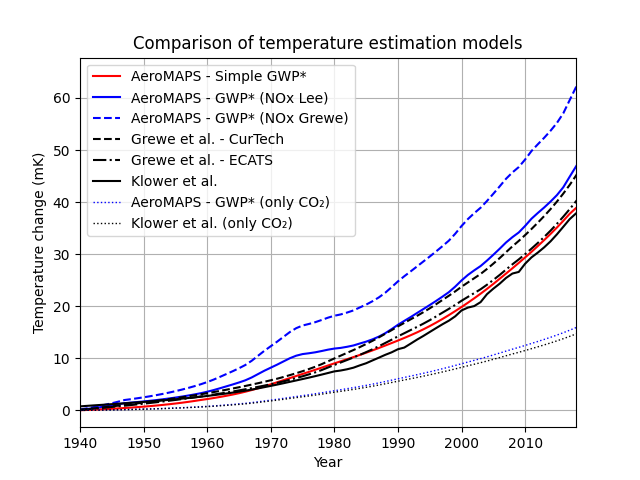

In [18]:
fig, ax = plt.subplots()
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_simple_gwpstar[0:80],
    color="red",
    label="AeroMAPS - Simple GWP*",
    linestyle="-",
)
#ax.plot(
#    data_years,
#    1000 * data_temperature_aeromaps_simple_gwpstar_non_co2[0:80]
#    + 1000 * data_temperature_aeromaps_simple_gwpstar_co2[0:80] / 1.2 * 0.95 / 0.88,
#    color="red",
#    label="AeroMAPS - Simple GWP* - Adjusted",
#    linestyle="--",
#)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar[0:80],
    color="blue",
    label="AeroMAPS - GWP* (NOx Lee)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_fair[0:80],
    color="blue",
    label="AeroMAPS - GWP* (NOx Grewe)",
    linestyle="--",
)
#ax.plot(
#    data_years,
#    1000 * data_temperature_aeromaps_gwpstar_non_co2[0:80]
#    + 1000 * data_temperature_aeromaps_gwpstar_co2[0:80] / 1.2 * 0.95 / 0.88,
#    color="blue",
#    label="AeroMAPS - GWP* - Adjusted",
#    linestyle="--",
#)
# ax.plot(data_years, data_temperature_grewe_curtech, color='blue', label='AeroMAPS - Simple GWP*', linestyle='--')
# ax.plot(data_years, data_temperature_grewe_curtech, color='blue', label='AeroMAPS - GWP* (FaIR TCRE)', linestyle='-.')
ax.plot(
    data_years,
    data_temperature_grewe_curtech,
    color="black",
    label="Grewe et al. - CurTech",
    linestyle="--",
)
ax.plot(
    data_years,
    data_temperature_grewe_ecats,
    color="black",
    label="Grewe et al. - ECATS",
    linestyle="-.",
)
ax.plot(data_years, data_temperature_klower, color="black", label="Klower et al.", linestyle="-")
ax.plot(
    data_years,
    1000 * data_temperature_aeromaps_gwpstar_co2[0:80],
    color="blue",
    label="AeroMAPS - GWP* (only CO₂)",
    linestyle=":",
    linewidth=1,
)
#ax.plot(
#    data_years,
#    1000 * data_temperature_aeromaps_gwpstar_co2[0:80] / 1.2 * 0.95 / 0.88,
#    color="red",
#    label="AeroMAPS - (Simple) GWP* (only CO₂) - Adjusted",
#    linestyle=":",
#    linewidth=1,
#)
ax.plot(
    data_years,
    data_temperature_klower_co2,
    color="black",
    label="Klower et al. (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

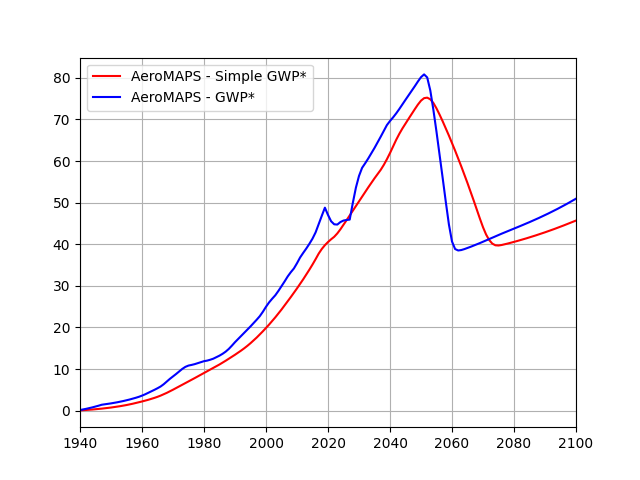

In [19]:
data_years_total = list(range(1940,2101))

fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    1000 * data_temperature_aeromaps_simple_gwpstar,
    color="red",
    label="AeroMAPS - Simple GWP*",
    linestyle="-",
)
#ax.plot(
#    data_years,
#    1000 * data_temperature_aeromaps_simple_gwpstar_non_co2[0:80]
#    + 1000 * data_temperature_aeromaps_simple_gwpstar_co2[0:80] / 1.2 * 0.95 / 0.88,
#    color="red",
#    label="AeroMAPS - Simple GWP* - Adjusted",
#    linestyle="--",
#)
ax.plot(
    data_years_total,
    1000 * data_temperature_aeromaps_gwpstar,
    color="blue",
    label="AeroMAPS - GWP*",
    linestyle="-",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()